In [1]:
from stable_baselines3 import PPO
import os

# ID del run salvato su WandB
run_id = "l6lwv8kh"  # Sostituisci con l'ID del tuo run salvato

# Percorso del modello
model_path = f"models/{run_id}/model"

# Carica il modello
loaded_model = PPO.load(model_path)



/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [2]:
#Enviroment set up
import wandb
from stable_baselines3 import PPO
from test_env2 import TestEnvironment2
from wandb.integration.sb3 import WandbCallback
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
import os

current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
data_path = os.path.join(parent_path, "data_new")

env = TestEnvironment2((224, 224), 15, data_path, render_mode = 'human')



/Users/nicoberlaender/Development/ADLR/Reinforcement_Learning/test_env2.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.unet = torch.load("saved_models/model_full_

Starting environment rendering for 5 episodes...


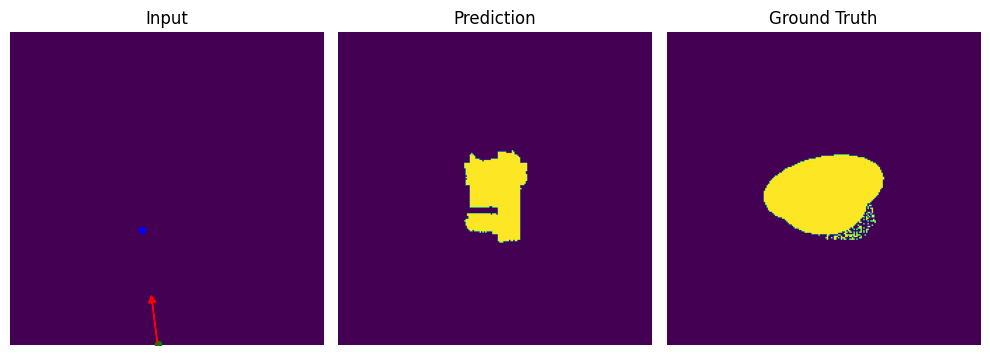

Current similarity : 0.5230049387774877
Episode 1:
  Action Taken: [-0.26565763  0.04054895]
  Reward Received: 0.5230049387774877
  Done: False, Truncated: False


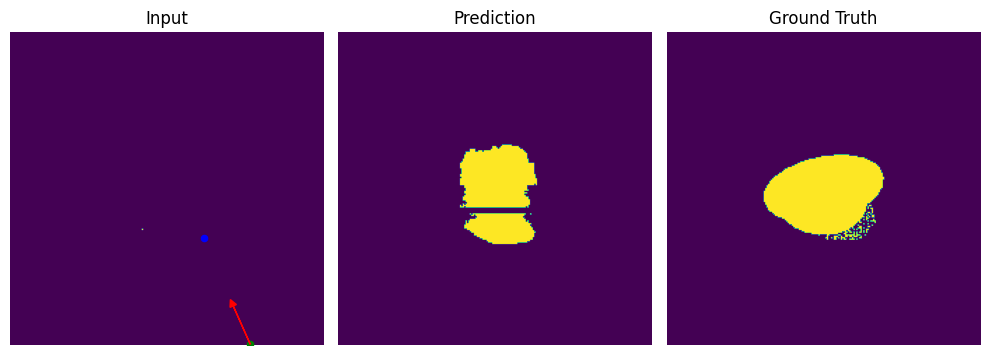

Current similarity : 0.5570359979997578
Episode 1:
  Action Taken: [-0.11765996  0.13334942]
  Reward Received: 0.5570359979997578
  Done: False, Truncated: False


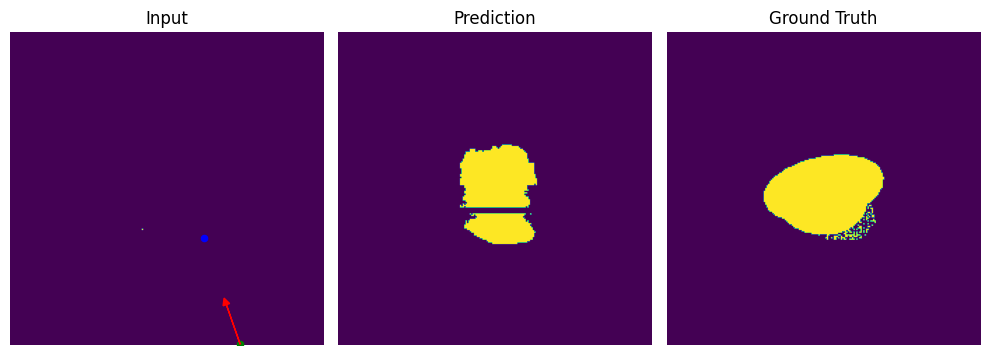

Current similarity : 0.5570359979997578
Episode 1:
  Action Taken: [-0.1337651   0.10692415]
  Reward Received: 0.5570359979997578
  Done: False, Truncated: False


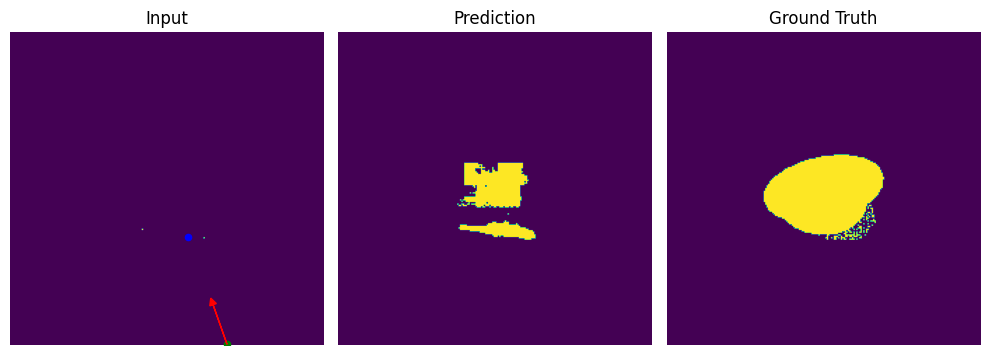

Current similarity : 0.3771861131878919
Episode 1:
  Action Taken: [-0.15478386  0.10792726]
  Reward Received: 0.3771861131878919
  Done: False, Truncated: False


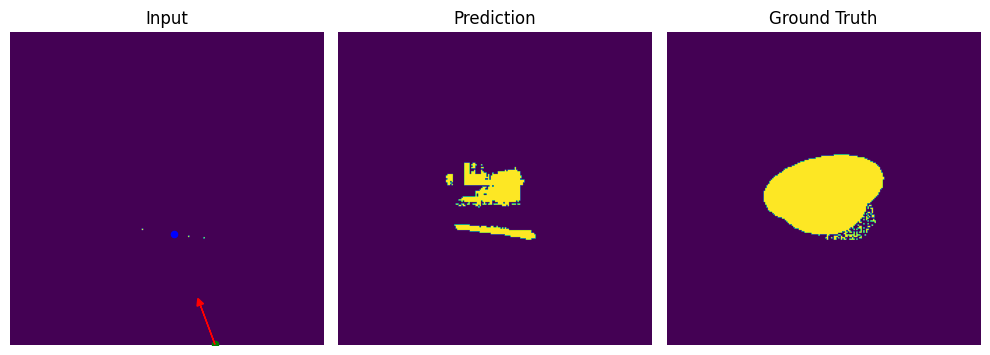

Current similarity : 0.2846677131646605
Episode 1:
  Action Taken: [-0.17409424  0.11344719]
  Reward Received: 0.2846677131646605
  Done: False, Truncated: False


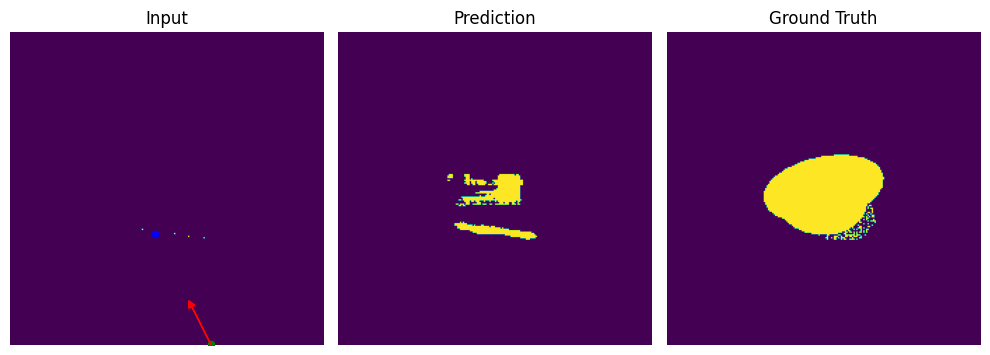

Current similarity : 0.21436058694592228
Episode 1:
  Action Taken: [-0.18071343  0.14888611]
  Reward Received: 0.21436058694592228
  Done: False, Truncated: False


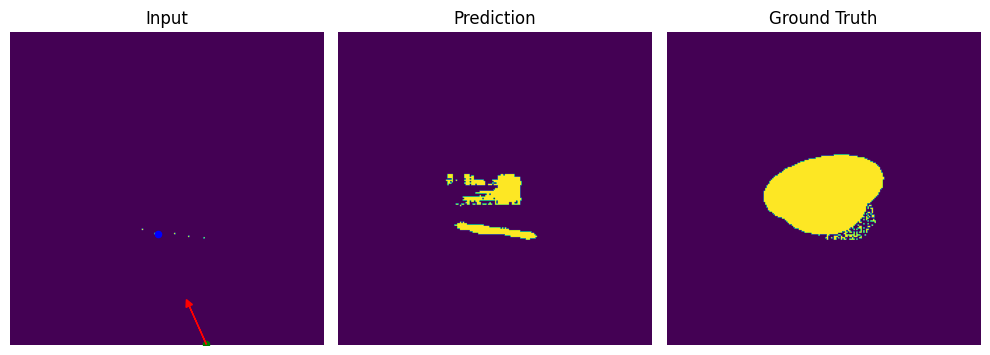

Current similarity : 0.21604614572206446
Episode 1:
  Action Taken: [-0.18779805  0.13354236]
  Reward Received: 0.21604614572206446
  Done: False, Truncated: False


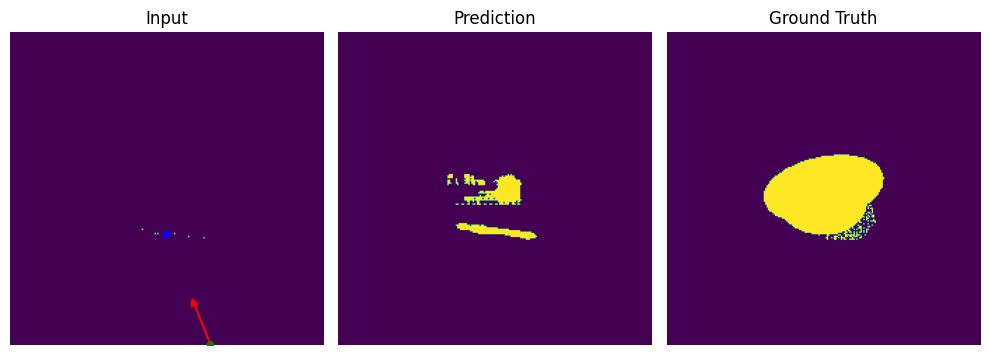

Current similarity : 0.19653634211583934
Episode 1:
  Action Taken: [-0.1812482   0.12238052]
  Reward Received: 0.19653634211583934
  Done: False, Truncated: False


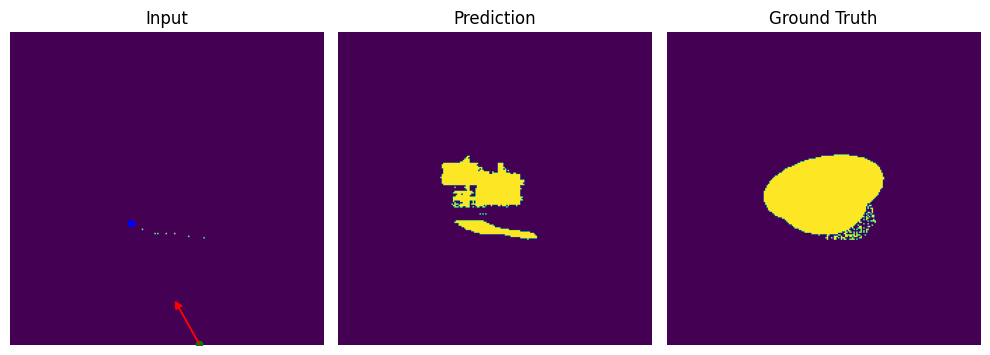

Current similarity : 0.3918367345939192
Episode 1:
  Action Taken: [-0.1987936   0.16299526]
  Reward Received: 0.3918367345939192
  Done: False, Truncated: False


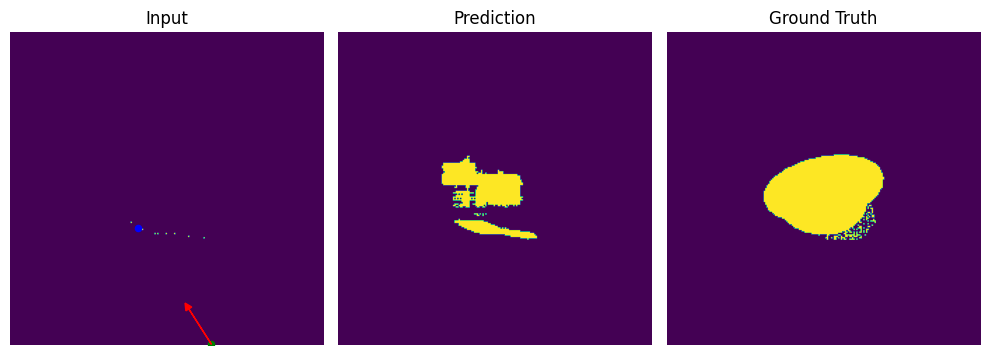

Current similarity : 0.3697650662998557
Episode 1:
  Action Taken: [-0.17965722  0.18120842]
  Reward Received: 0.3697650662998557
  Done: False, Truncated: False


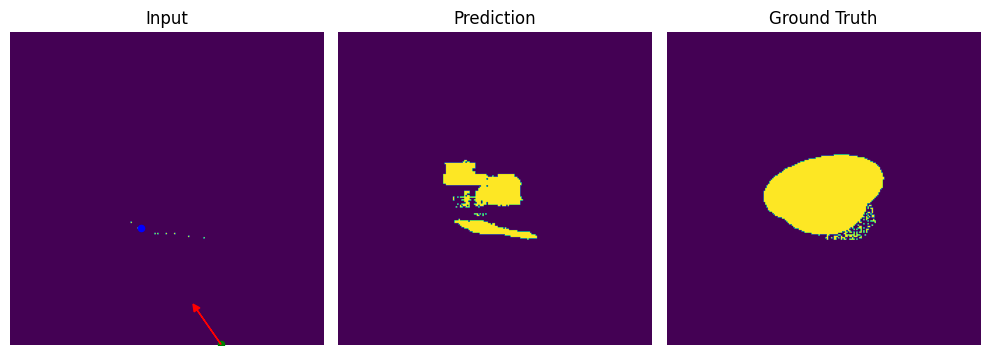

Current similarity : 0.3350515463053991
Episode 1:
  Action Taken: [-0.16451253  0.19339427]
  Reward Received: 0.3350515463053991
  Done: False, Truncated: False


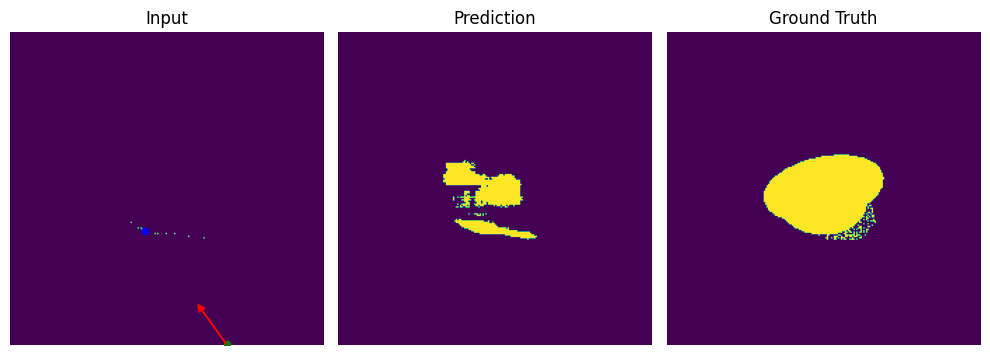

Current similarity : 0.3330749353144509
Episode 1:
  Action Taken: [-0.15558527  0.19863091]
  Reward Received: 0.3330749353144509
  Done: False, Truncated: False


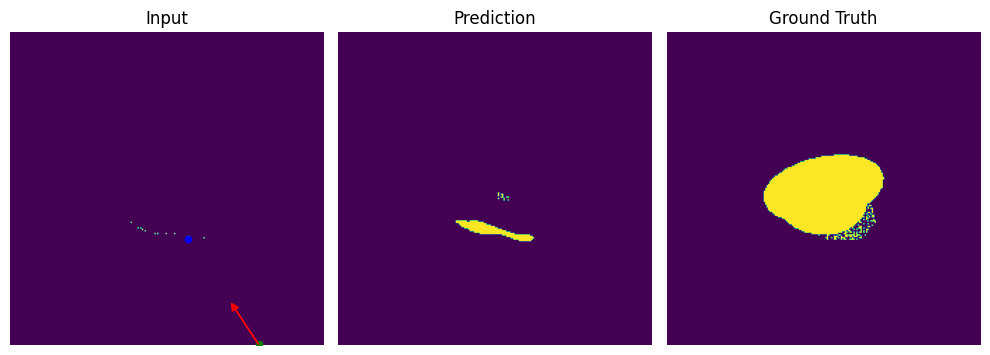

Current similarity : 0.0672468354253041
Episode 1:
  Action Taken: [-0.10456908  0.1860822 ]
  Reward Received: 0.0672468354253041
  Done: False, Truncated: False


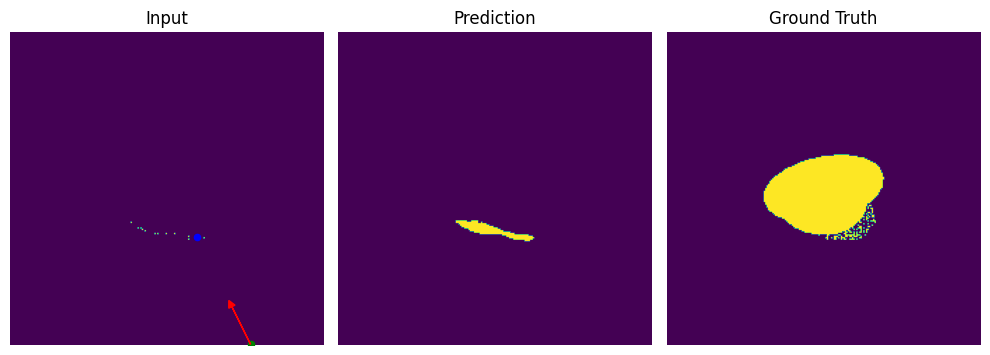

Current similarity : 0.061262212817200366
Episode 1:
  Action Taken: [-0.11730853  0.14640382]
  Reward Received: 0.061262212817200366
  Done: False, Truncated: False


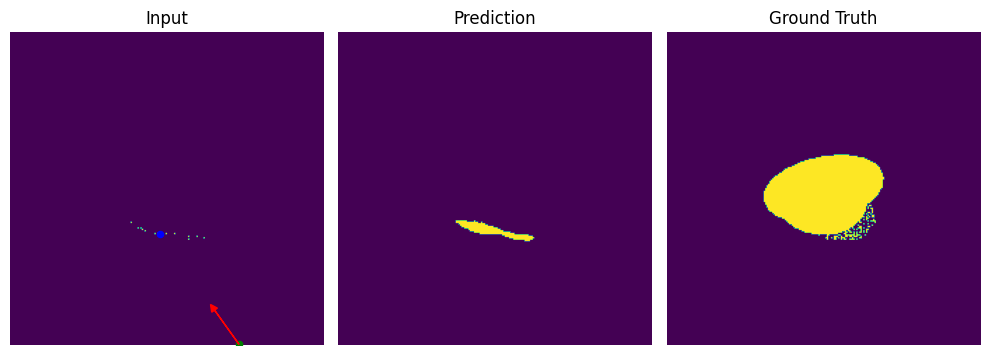

Current similarity : 0.05994190650648484
Episode 1:
  Action Taken: [-0.13570203  0.19758515]
  Reward Received: 0.05994190650648484
  Done: True, Truncated: False
Episode 1 finished. Resetting environment...


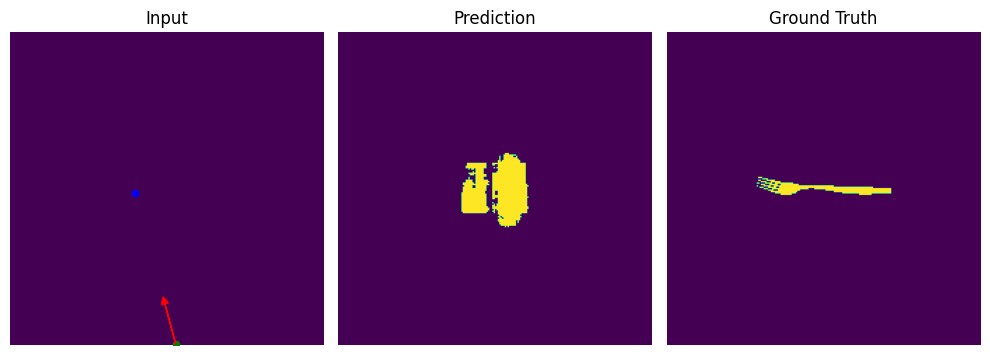

Current similarity : 0.08999470614611185
Episode 2:
  Action Taken: [-0.2366002   0.08325072]
  Reward Received: 0.08999470614611185
  Done: False, Truncated: False


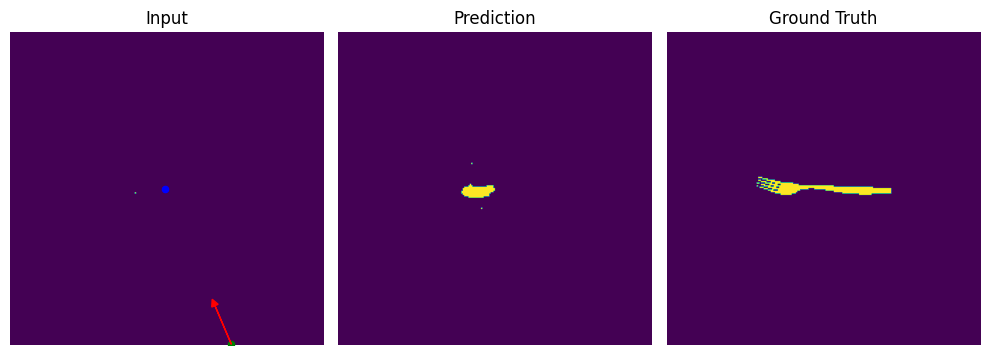

Current similarity : 0.10899653960381221
Episode 2:
  Action Taken: [-0.1478623   0.12801243]
  Reward Received: 0.10899653960381221
  Done: False, Truncated: False


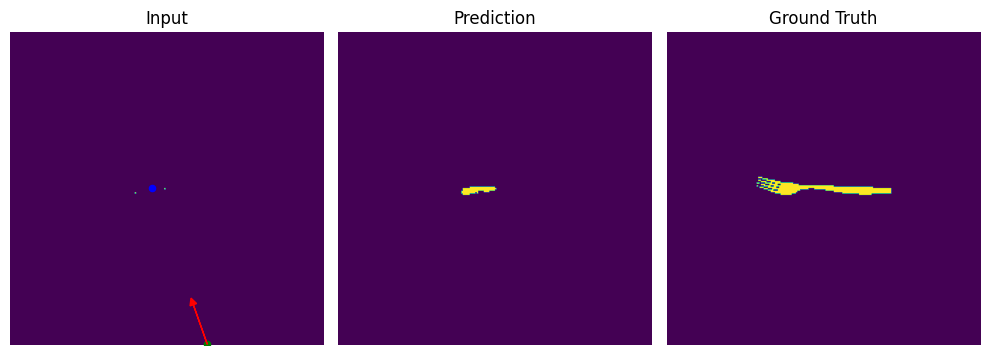

Current similarity : 0.10291262115939297
Episode 2:
  Action Taken: [-0.18626888  0.10800276]
  Reward Received: 0.10291262115939297
  Done: False, Truncated: False


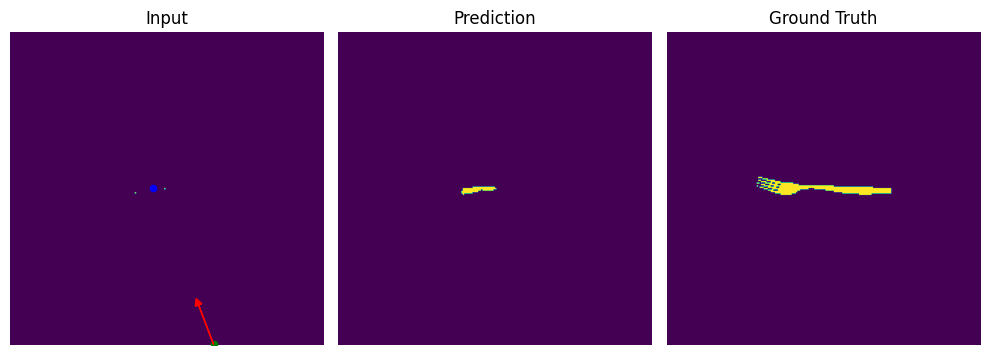

Current similarity : 0.10159362529563024
Episode 2:
  Action Taken: [-0.17635956  0.11552549]
  Reward Received: 0.10159362529563024
  Done: False, Truncated: False


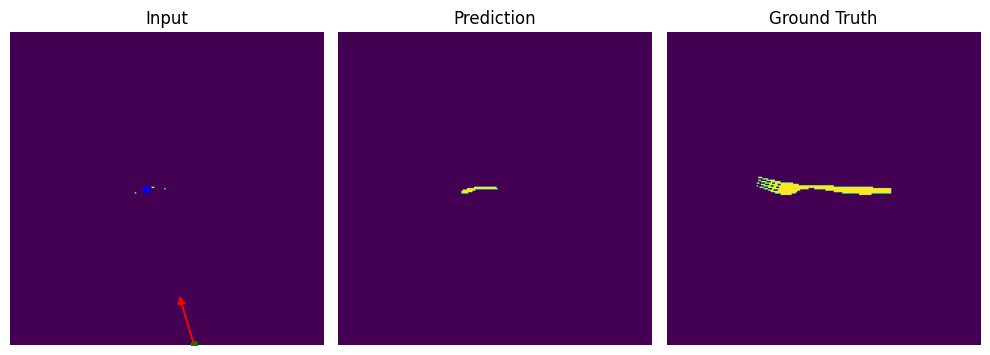

Current similarity : 0.10165975082643205
Episode 2:
  Action Taken: [-0.20770362  0.0933045 ]
  Reward Received: 0.10165975082643205
  Done: False, Truncated: False


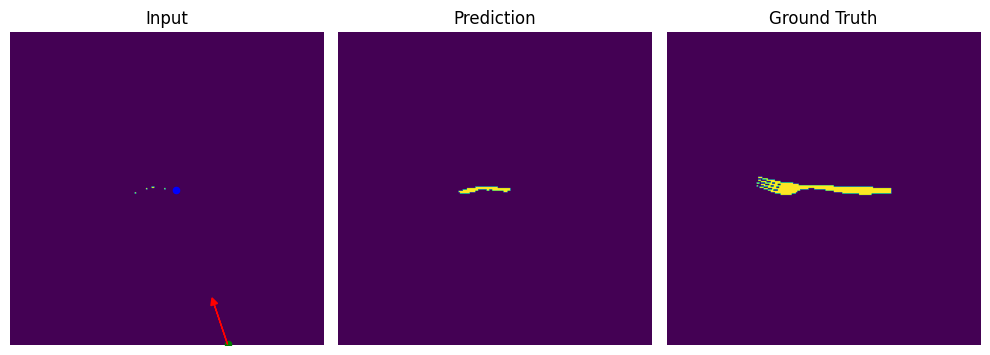

Current similarity : 0.14807302201202227
Episode 2:
  Action Taken: [-0.15393342  0.10306089]
  Reward Received: 0.14807302201202227
  Done: False, Truncated: False


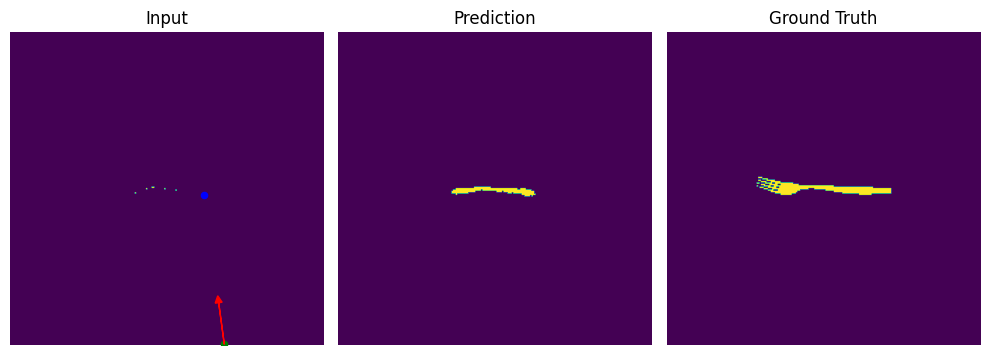

Current similarity : 0.3056092837415681
Episode 2:
  Action Taken: [-0.15914808  0.04279867]
  Reward Received: 0.3056092837415681
  Done: False, Truncated: False


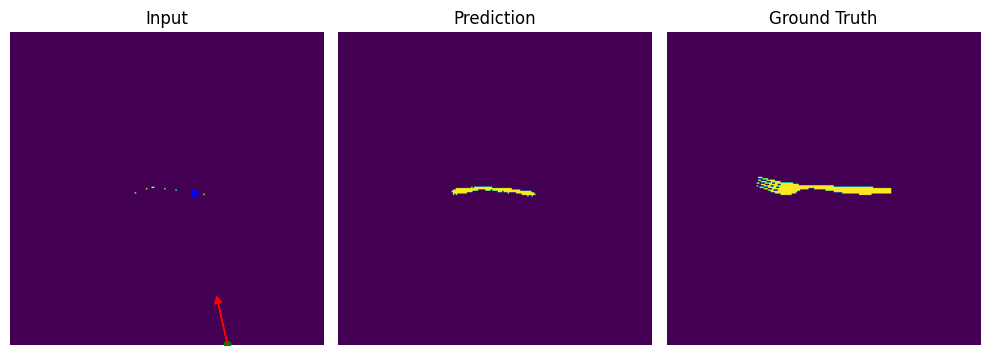

Current similarity : 0.2783300193273757
Episode 2:
  Action Taken: [-0.15415639  0.07029574]
  Reward Received: 0.2783300193273757
  Done: False, Truncated: False


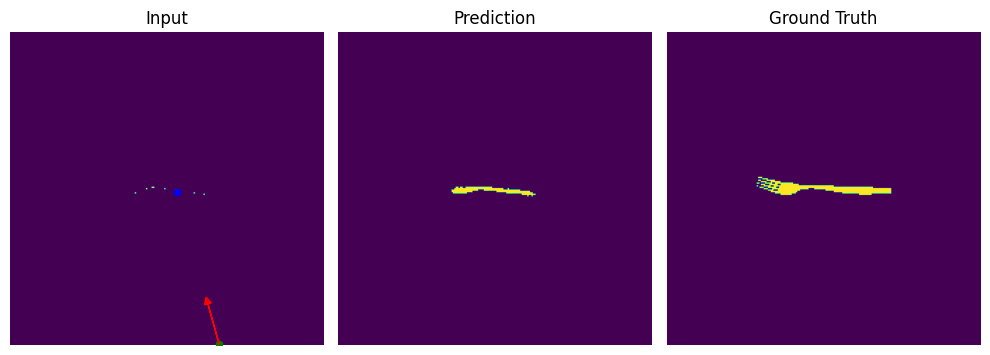

Current similarity : 0.281800390837964
Episode 2:
  Action Taken: [-0.16732715  0.08637306]
  Reward Received: 0.281800390837964
  Done: False, Truncated: False


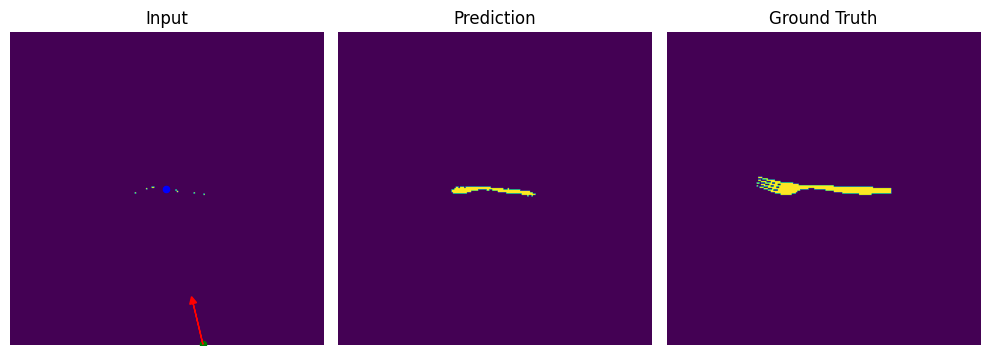

Current similarity : 0.28514851428683463
Episode 2:
  Action Taken: [-0.1932574   0.07472877]
  Reward Received: 0.28514851428683463
  Done: False, Truncated: False


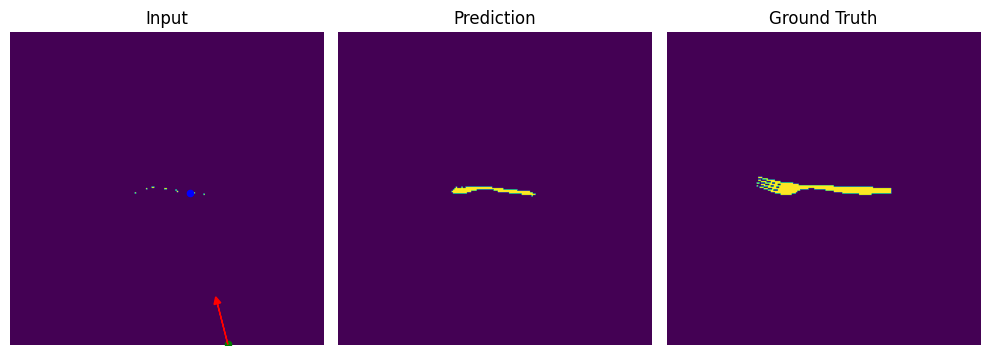

Current similarity : 0.27710843317849715
Episode 2:
  Action Taken: [-0.1534817   0.07984269]
  Reward Received: 0.27710843317849715
  Done: False, Truncated: False


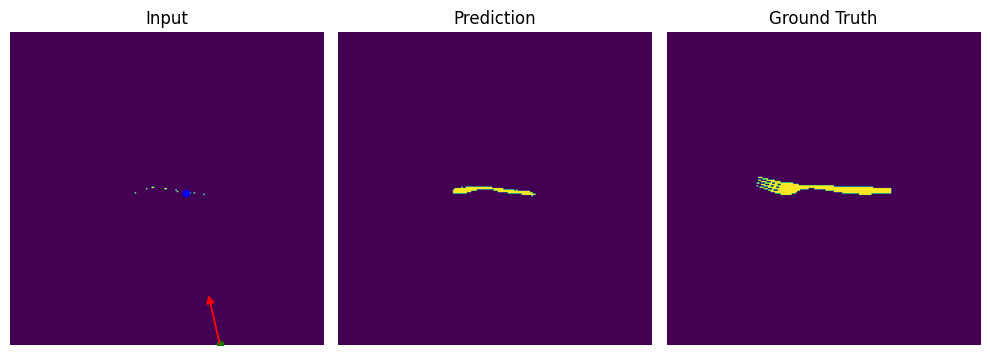

Current similarity : 0.27054108162216217
Episode 2:
  Action Taken: [-0.16635525  0.07187134]
  Reward Received: 0.27054108162216217
  Done: False, Truncated: False


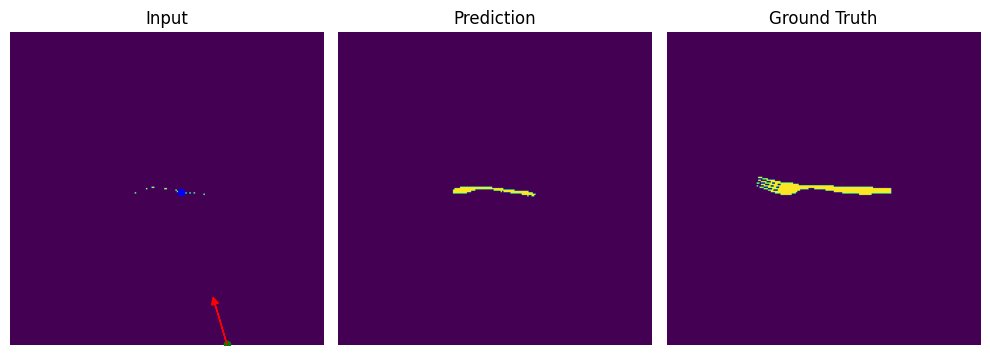

Current similarity : 0.27474747419242934
Episode 2:
  Action Taken: [-0.15493235  0.09187134]
  Reward Received: 0.27474747419242934
  Done: False, Truncated: False


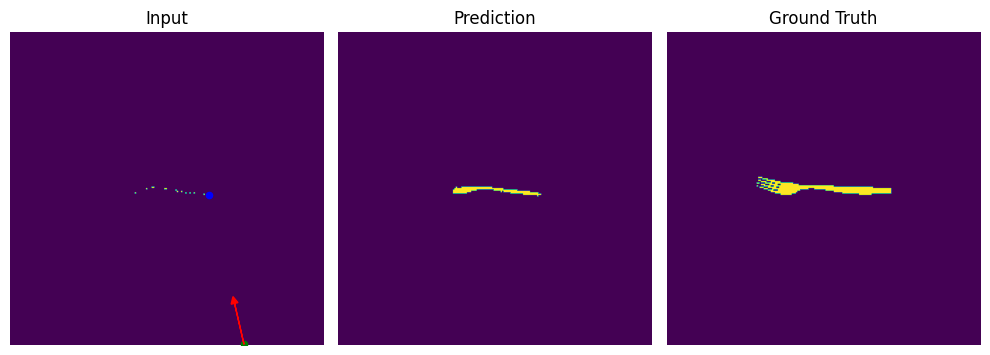

Current similarity : 0.29817444158585305
Episode 2:
  Action Taken: [-0.12771253  0.07224403]
  Reward Received: 0.29817444158585305
  Done: False, Truncated: False


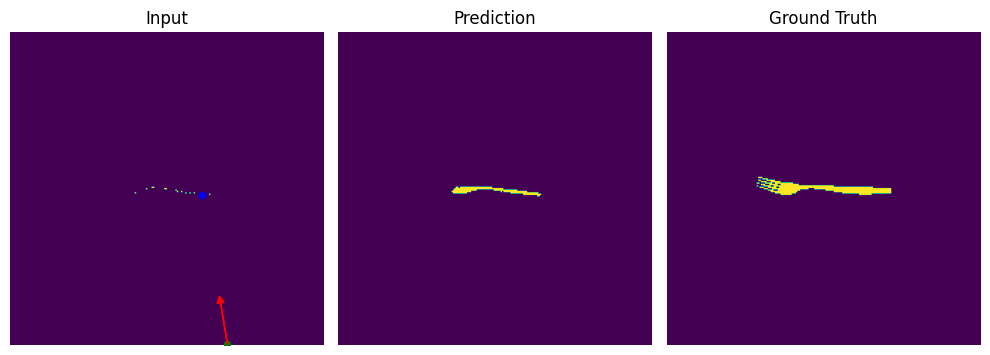

Current similarity : 0.299595141093937
Episode 2:
  Action Taken: [-0.1540735   0.05261532]
  Reward Received: 0.299595141093937
  Done: True, Truncated: False
Episode 2 finished. Resetting environment...


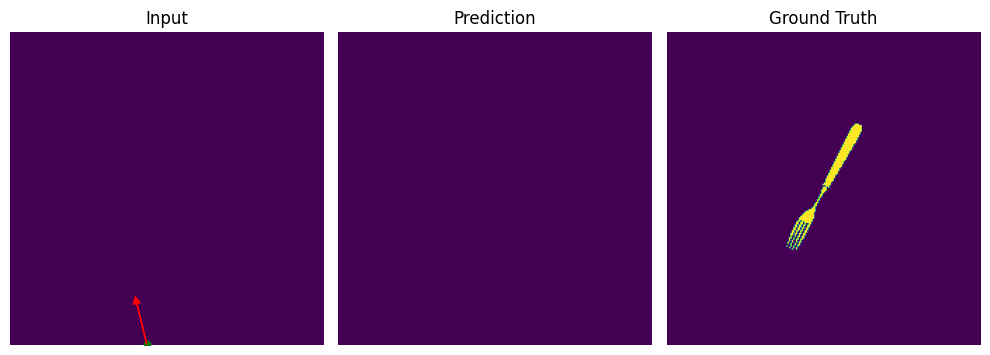

Current similarity : 0
Episode 3:
  Action Taken: [-0.28281385  0.0765392 ]
  Reward Received: 0
  Done: False, Truncated: False


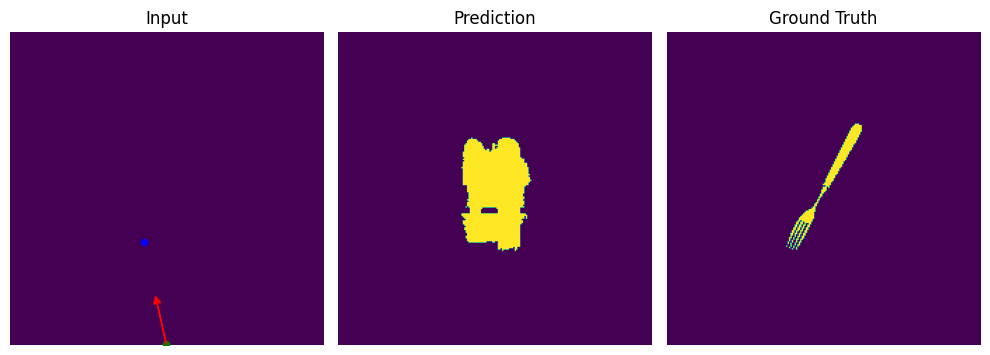

Current similarity : 0.1167290886027687
Episode 3:
  Action Taken: [-0.25165185  0.07036089]
  Reward Received: 0.1167290886027687
  Done: False, Truncated: False


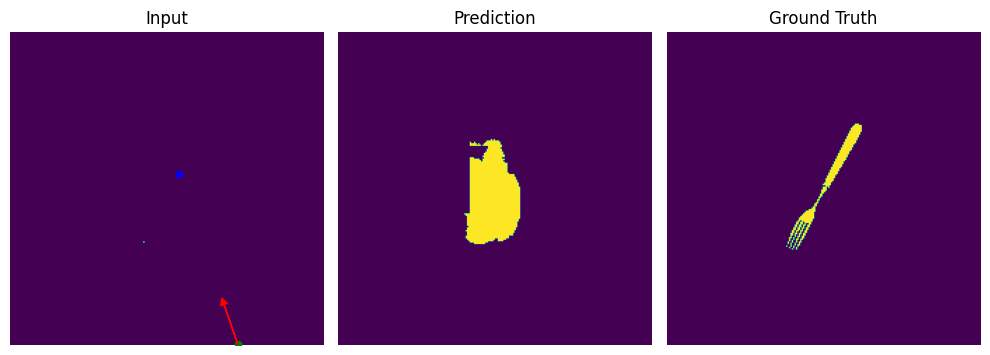

Current similarity : 0.10961145189790943
Episode 3:
  Action Taken: [-0.13760799  0.10600672]
  Reward Received: 0.10961145189790943
  Done: False, Truncated: False


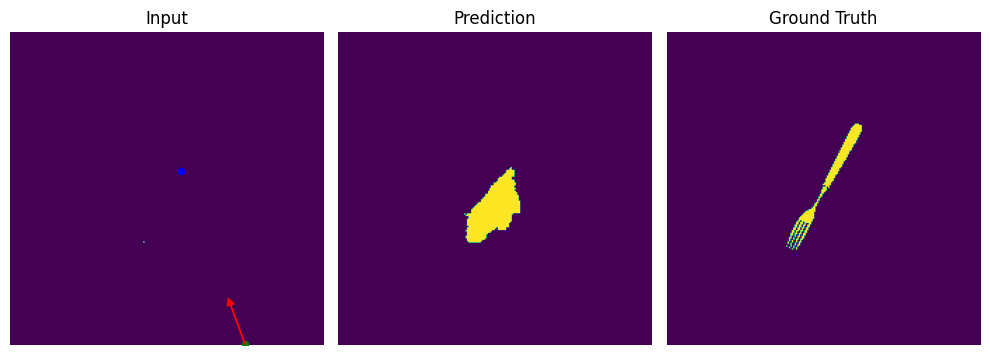

Current similarity : 0.1631108051182995
Episode 3:
  Action Taken: [-0.12599547  0.11160385]
  Reward Received: 0.1631108051182995
  Done: False, Truncated: False


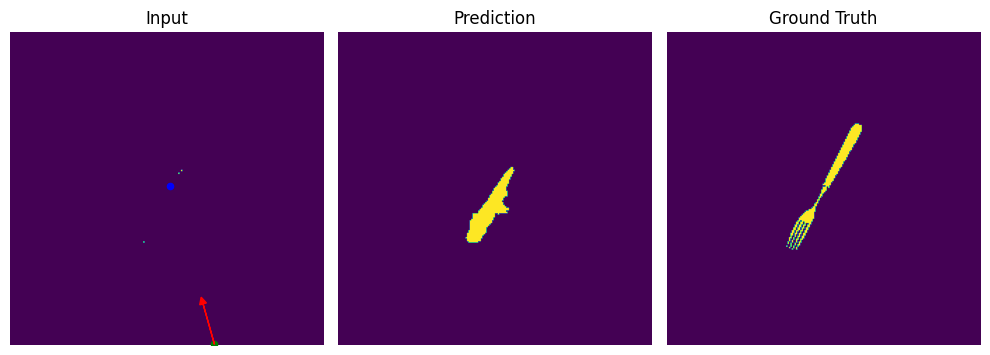

Current similarity : 0.20846233208621018
Episode 3:
  Action Taken: [-0.17484745  0.08756538]
  Reward Received: 0.20846233208621018
  Done: False, Truncated: False


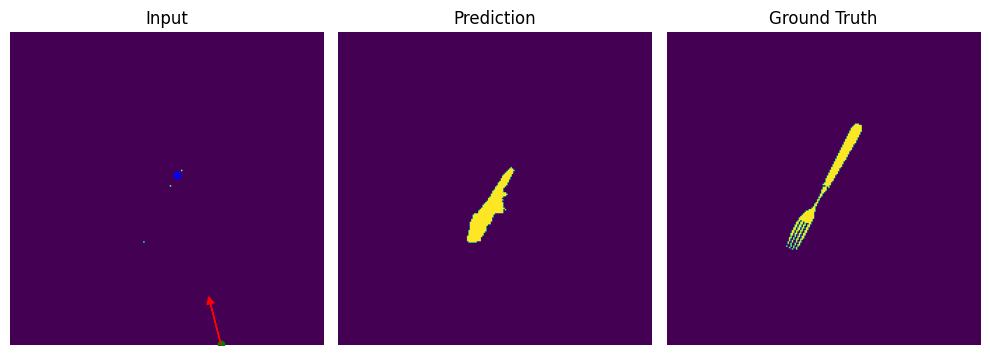

Current similarity : 0.21645021621596297
Episode 3:
  Action Taken: [-0.16463417  0.07972158]
  Reward Received: 0.21645021621596297
  Done: False, Truncated: False


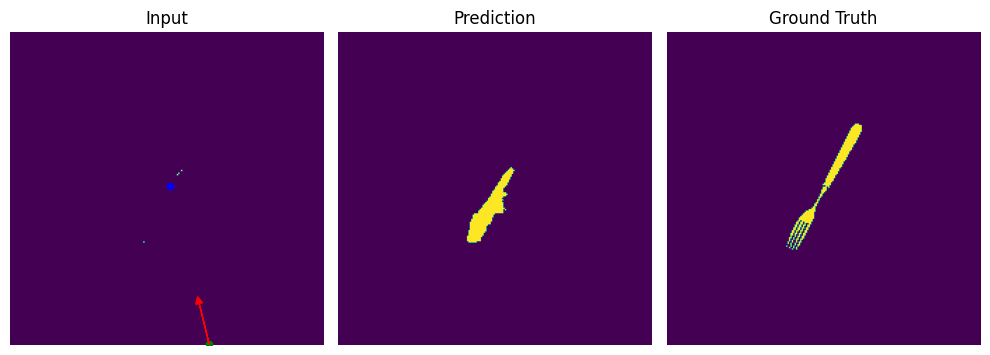

Current similarity : 0.21645021621596297
Episode 3:
  Action Taken: [-0.18318993  0.0766947 ]
  Reward Received: 0.21645021621596297
  Done: False, Truncated: False


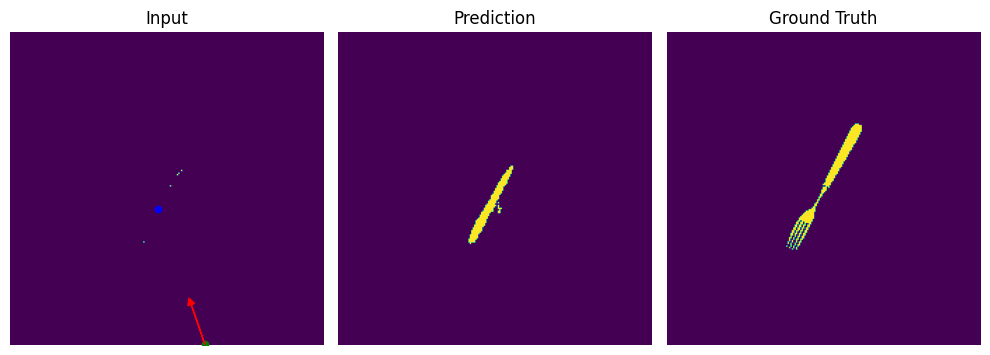

Current similarity : 0.19123505950699196
Episode 3:
  Action Taken: [-0.19016016  0.10515094]
  Reward Received: 0.19123505950699196
  Done: False, Truncated: False


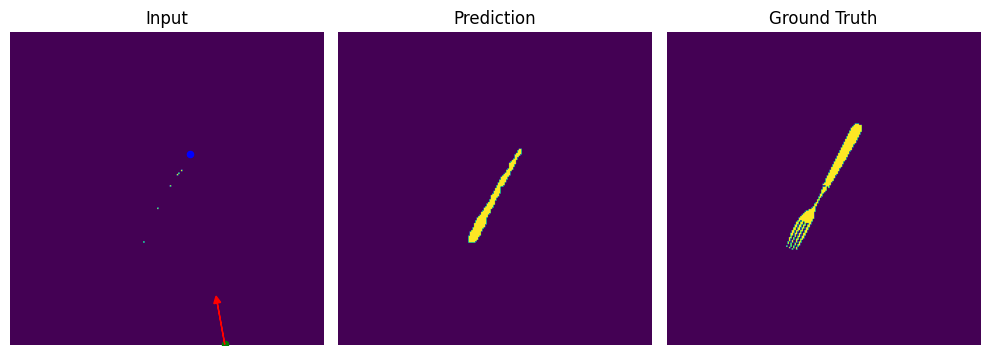

Current similarity : 0.25414364605781264
Episode 3:
  Action Taken: [-0.15840028  0.05713972]
  Reward Received: 0.25414364605781264
  Done: False, Truncated: False


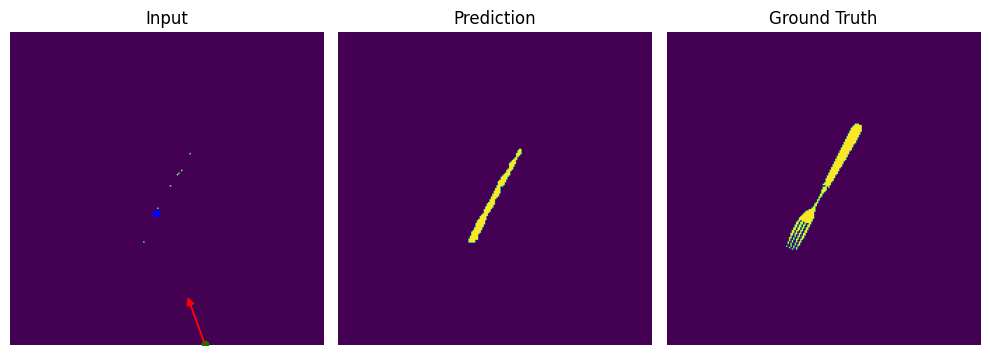

Current similarity : 0.22804532545602646
Episode 3:
  Action Taken: [-0.19015819  0.11152656]
  Reward Received: 0.22804532545602646
  Done: False, Truncated: False


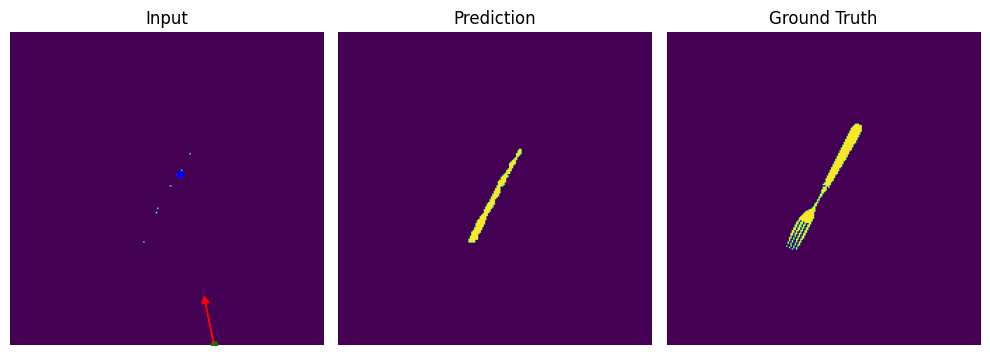

Current similarity : 0.22967189696195164
Episode 3:
  Action Taken: [-0.17585748  0.06336966]
  Reward Received: 0.22967189696195164
  Done: False, Truncated: False


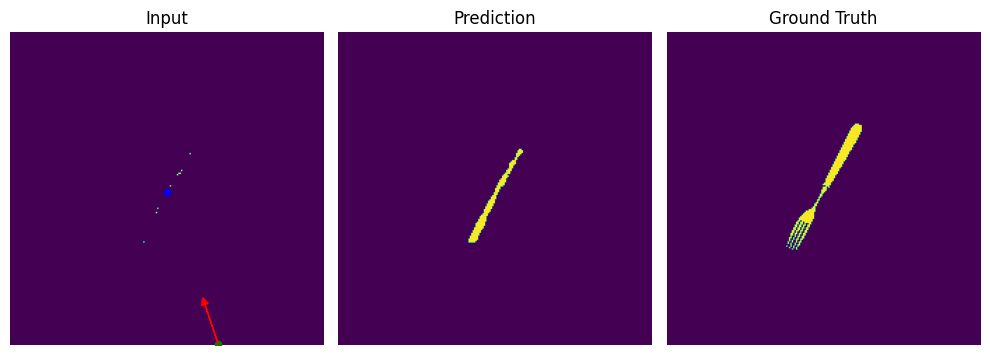

Current similarity : 0.2220630369311418
Episode 3:
  Action Taken: [-0.16877839  0.10293494]
  Reward Received: 0.2220630369311418
  Done: False, Truncated: False


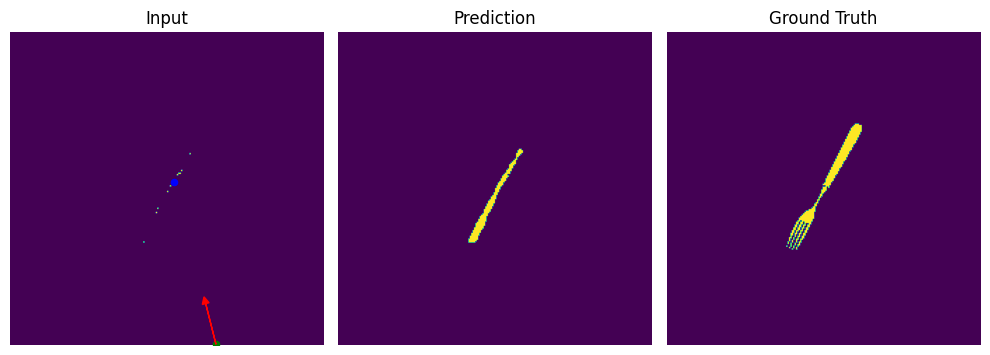

Current similarity : 0.21613832821882084
Episode 3:
  Action Taken: [-0.1724295  0.0787433]
  Reward Received: 0.21613832821882084
  Done: False, Truncated: False


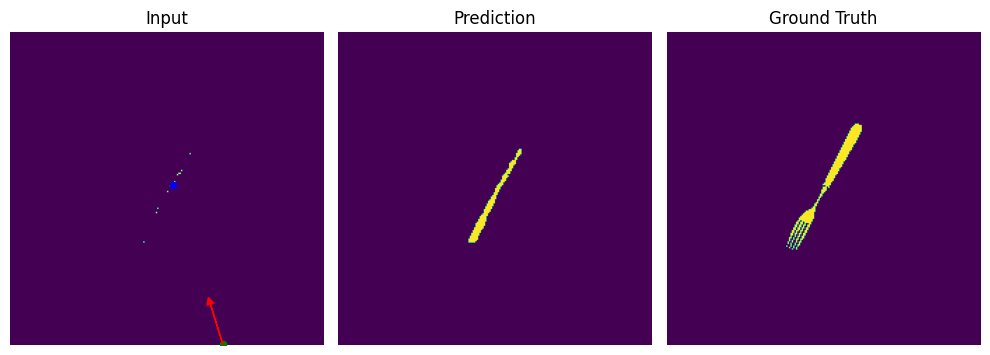

Current similarity : 0.21820809217021953
Episode 3:
  Action Taken: [-0.161437   0.0957592]
  Reward Received: 0.21820809217021953
  Done: False, Truncated: False


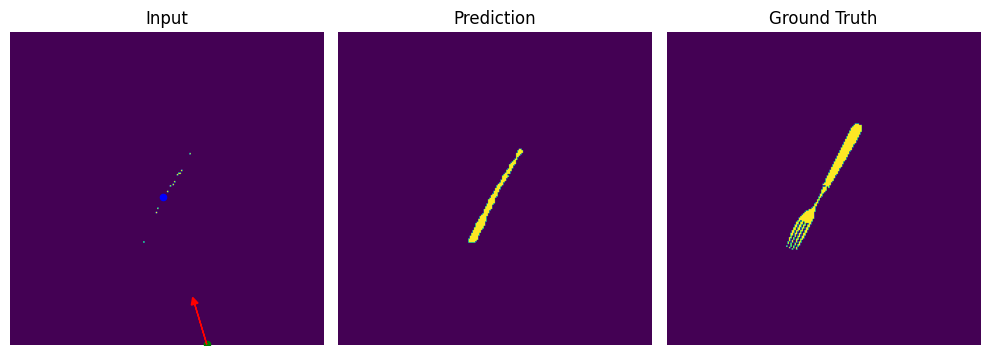

Current similarity : 0.21965317887333355
Episode 3:
  Action Taken: [-0.1871225   0.09293152]
  Reward Received: 0.21965317887333355
  Done: True, Truncated: False
Episode 3 finished. Resetting environment...


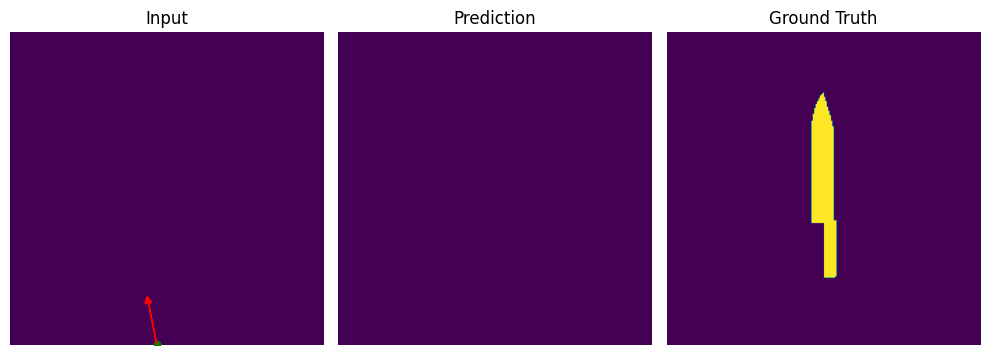

Current similarity : 0
Episode 4:
  Action Taken: [-0.2669572   0.06295712]
  Reward Received: 0
  Done: False, Truncated: False


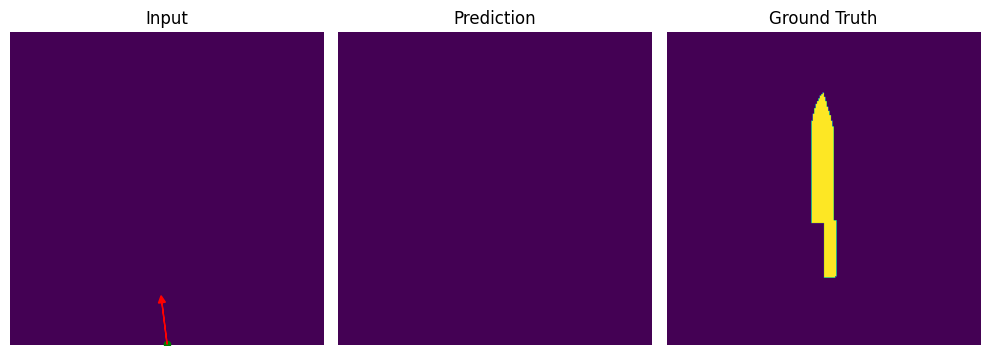

Current similarity : 0
Episode 4:
  Action Taken: [-0.25041613  0.03934384]
  Reward Received: 0
  Done: False, Truncated: False


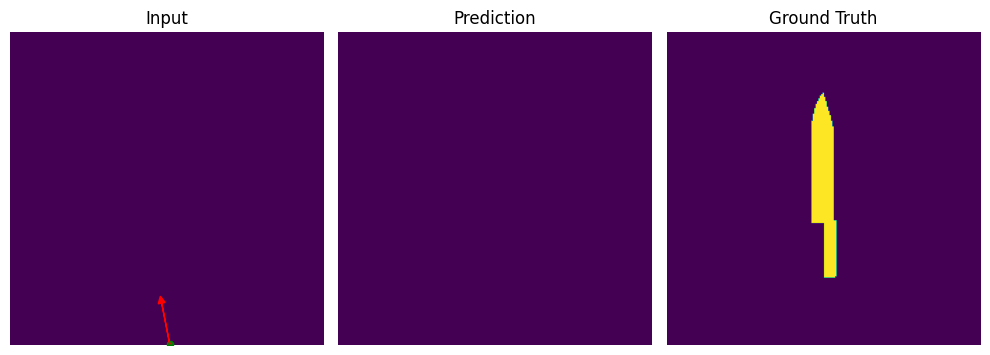

Current similarity : 0
Episode 4:
  Action Taken: [-0.24613553  0.06172322]
  Reward Received: 0
  Done: False, Truncated: False


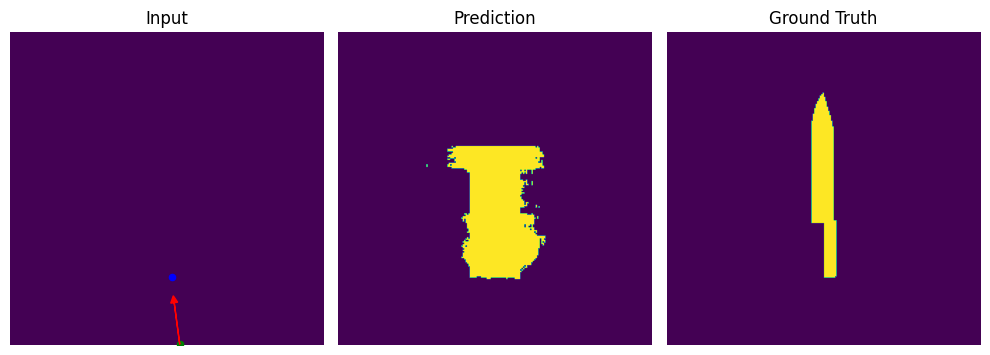

Current similarity : 0.2489408916181277
Episode 4:
  Action Taken: [-0.23023193  0.04225185]
  Reward Received: 0.2489408916181277
  Done: False, Truncated: False


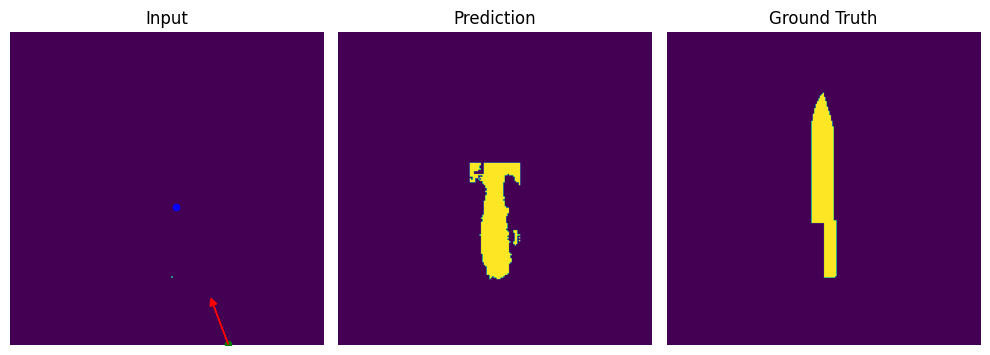

Current similarity : 0.4208942388560214
Episode 4:
  Action Taken: [-0.15285847  0.11506802]
  Reward Received: 0.4208942388560214
  Done: False, Truncated: False


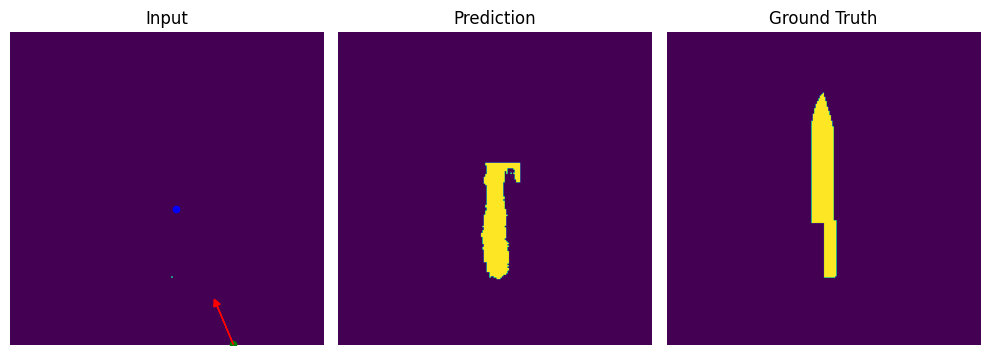

Current similarity : 0.43416030513637394
Episode 4:
  Action Taken: [-0.14487727  0.12653013]
  Reward Received: 0.43416030513637394
  Done: False, Truncated: False


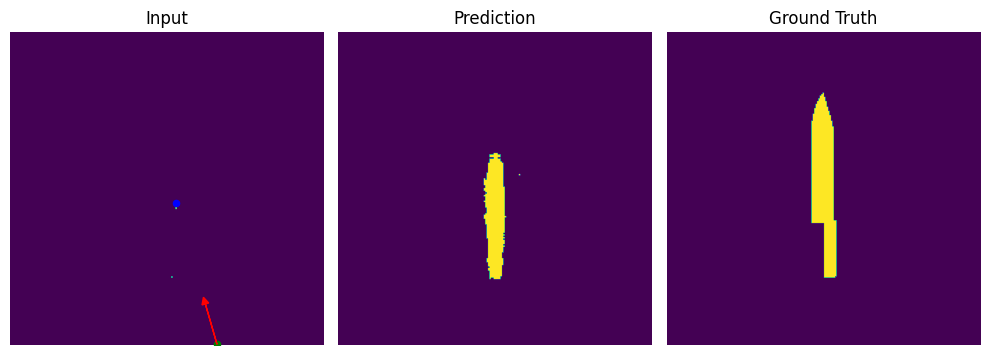

Current similarity : 0.4501319258838354
Episode 4:
  Action Taken: [-0.17078362  0.08945657]
  Reward Received: 0.4501319258838354
  Done: False, Truncated: False


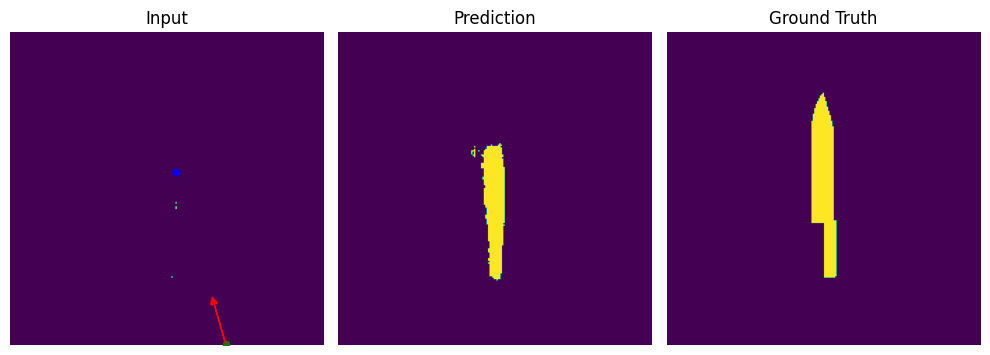

Current similarity : 0.5295055818556589
Episode 4:
  Action Taken: [-0.1568238   0.08949204]
  Reward Received: 0.5295055818556589
  Done: False, Truncated: False


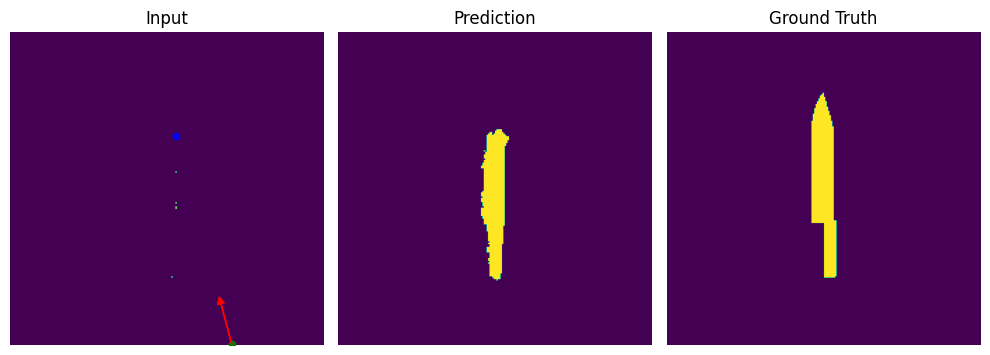

Current similarity : 0.618572927272522
Episode 4:
  Action Taken: [-0.147187    0.08287109]
  Reward Received: 0.618572927272522
  Done: False, Truncated: False


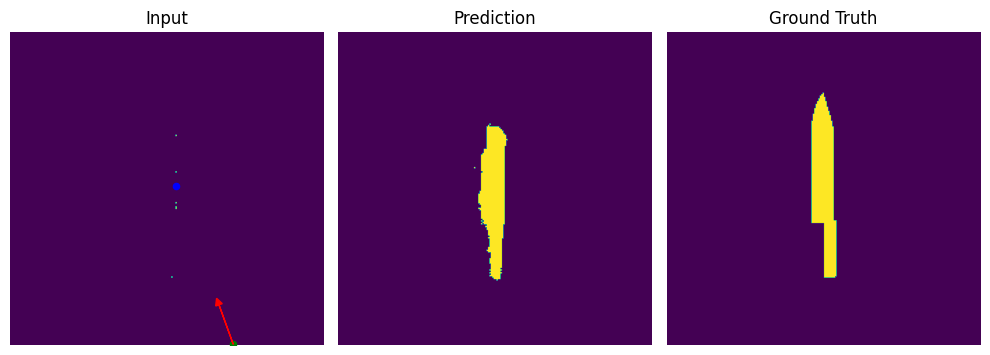

Current similarity : 0.6440765645917865
Episode 4:
  Action Taken: [-0.14486712  0.11041723]
  Reward Received: 0.6440765645917865
  Done: False, Truncated: False


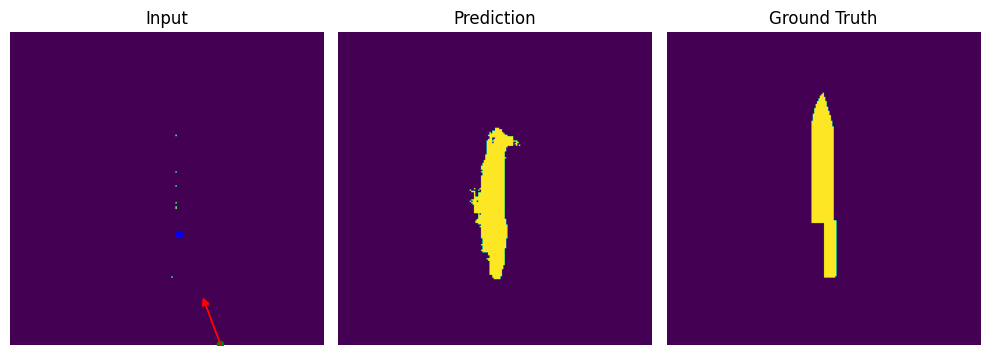

Current similarity : 0.5859519405795047
Episode 4:
  Action Taken: [-0.16530038  0.11425254]
  Reward Received: 0.5859519405795047
  Done: False, Truncated: False


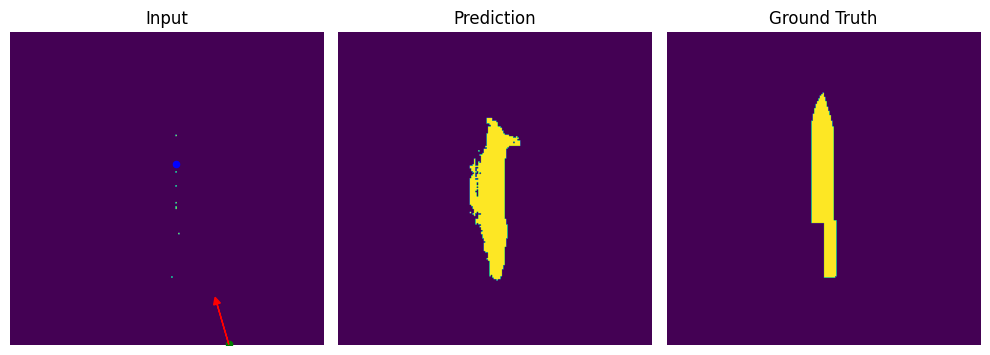

Current similarity : 0.5794631441928151
Episode 4:
  Action Taken: [-0.15201442  0.09030464]
  Reward Received: 0.5794631441928151
  Done: False, Truncated: False


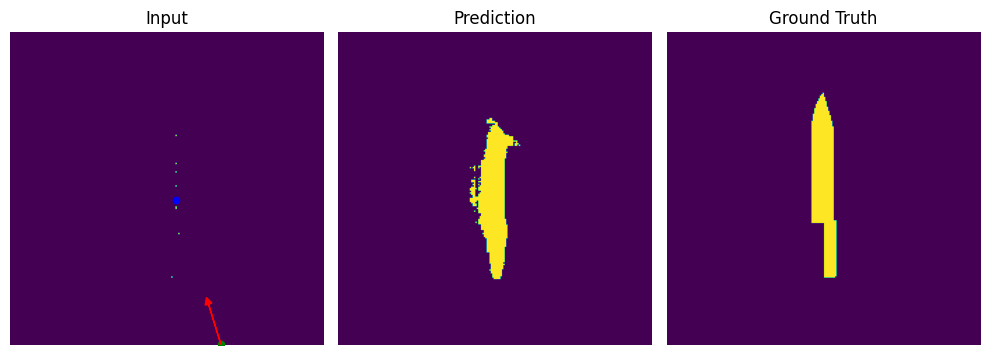

Current similarity : 0.6199347924453029
Episode 4:
  Action Taken: [-0.16456114  0.09533976]
  Reward Received: 0.6199347924453029
  Done: False, Truncated: False


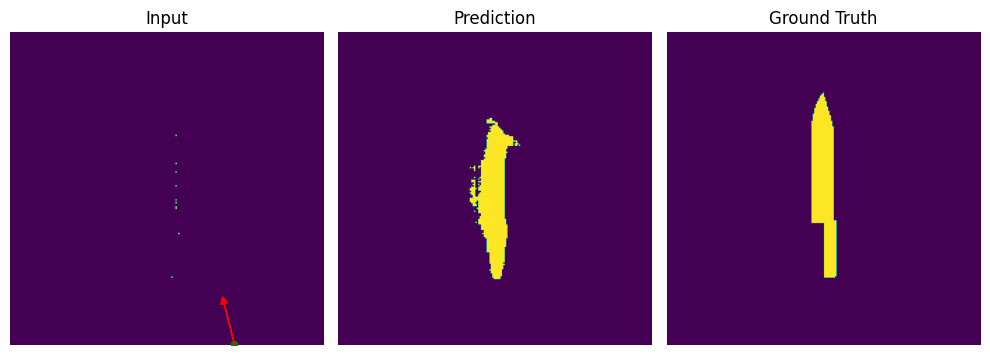

Current similarity : 0.6199347924453029
Episode 4:
  Action Taken: [-0.1429388   0.07904313]
  Reward Received: 0
  Done: False, Truncated: False


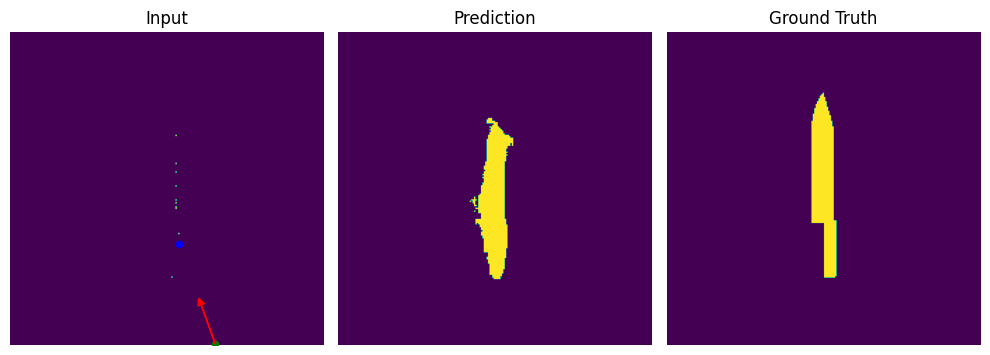

Current similarity : 0.6286939939806034
Episode 4:
  Action Taken: [-0.17331217  0.11036292]
  Reward Received: 0.6286939939806034
  Done: True, Truncated: False
Episode 4 finished. Resetting environment...


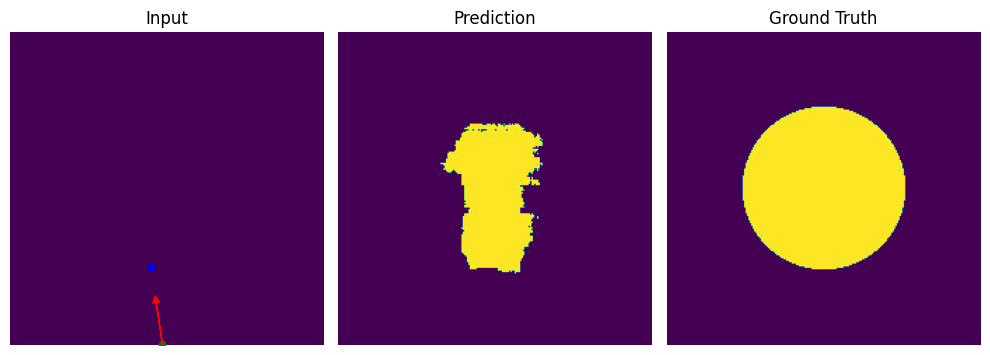

Current similarity : 0.4738366659994546
Episode 5:
  Action Taken: [-0.25782177  0.04707917]
  Reward Received: 0.4738366659994546
  Done: False, Truncated: False


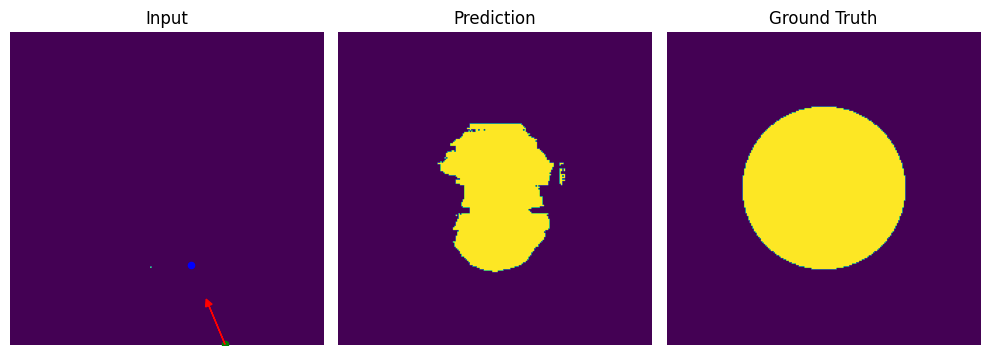

Current similarity : 0.569648711890431
Episode 5:
  Action Taken: [-0.15801236  0.12584685]
  Reward Received: 0.569648711890431
  Done: False, Truncated: False


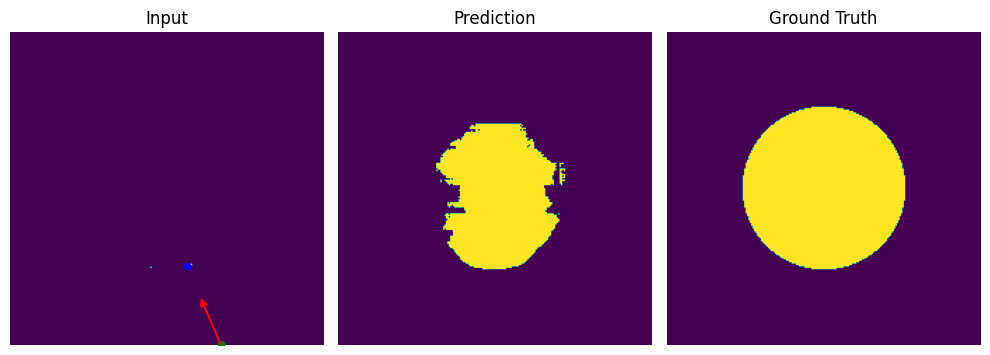

Current similarity : 0.6265252486740637
Episode 5:
  Action Taken: [-0.16495636  0.12944135]
  Reward Received: 0.6265252486740637
  Done: False, Truncated: False


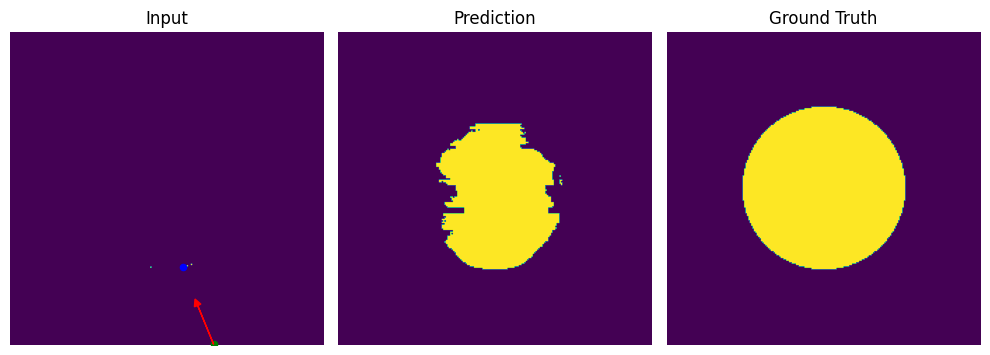

Current similarity : 0.6293410924883291
Episode 5:
  Action Taken: [-0.17620113  0.12406128]
  Reward Received: 0.6293410924883291
  Done: False, Truncated: False


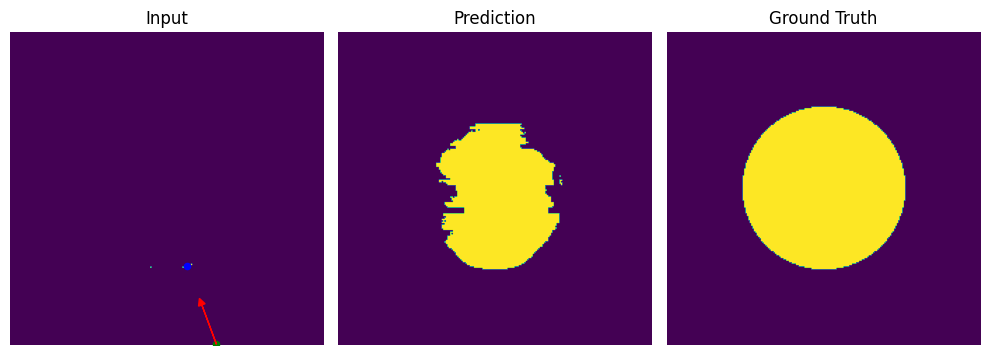

Current similarity : 0.6293410924883291
Episode 5:
  Action Taken: [-0.1716792   0.11313404]
  Reward Received: 0.6293410924883291
  Done: False, Truncated: False


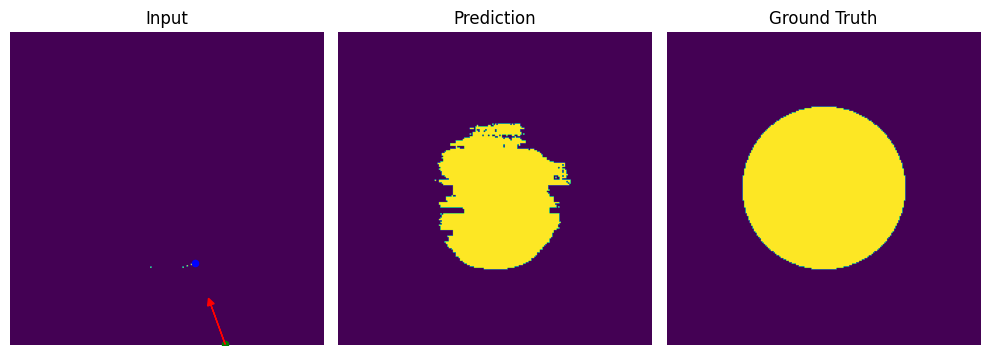

Current similarity : 0.6447343720063137
Episode 5:
  Action Taken: [-0.15771934  0.1107069 ]
  Reward Received: 0.6447343720063137
  Done: False, Truncated: False


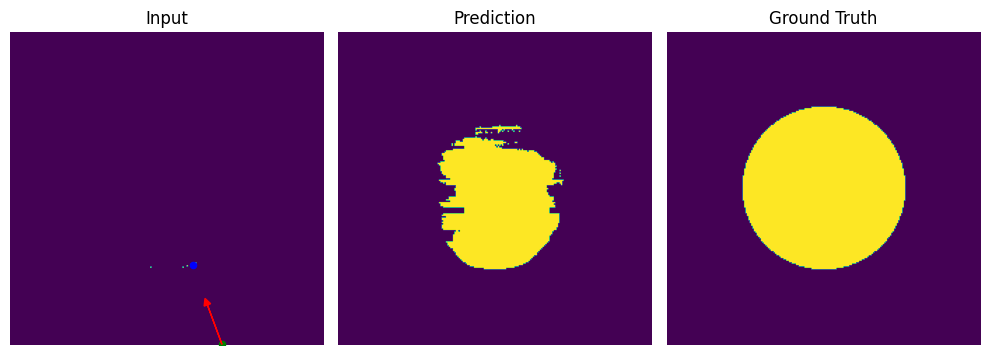

Current similarity : 0.5917026468376476
Episode 5:
  Action Taken: [-0.16288665  0.11265939]
  Reward Received: 0.5917026468376476
  Done: False, Truncated: False


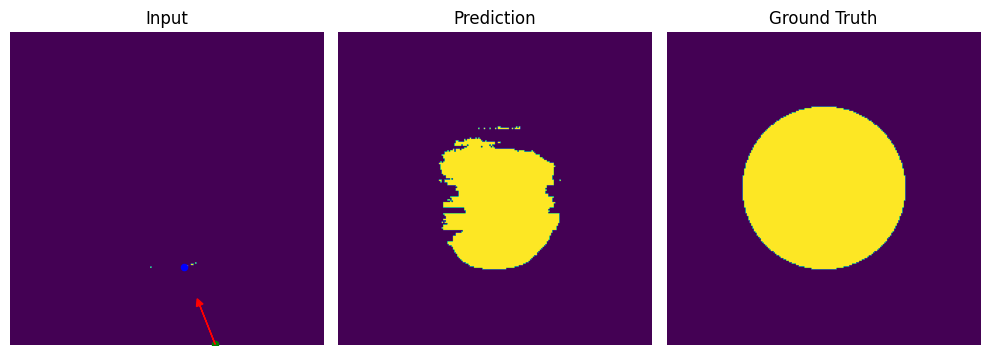

Current similarity : 0.5655152993649788
Episode 5:
  Action Taken: [-0.17369983  0.11993696]
  Reward Received: 0.5655152993649788
  Done: False, Truncated: False


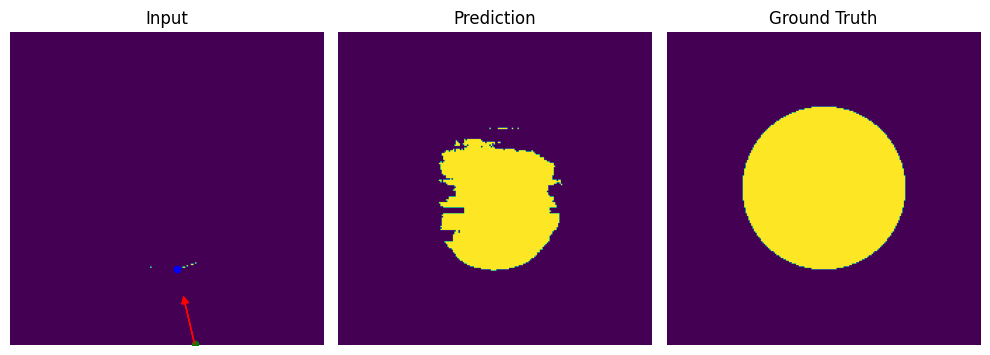

Current similarity : 0.5748592870004823
Episode 5:
  Action Taken: [-0.2065438  0.0726689]
  Reward Received: 0.5748592870004823
  Done: False, Truncated: False


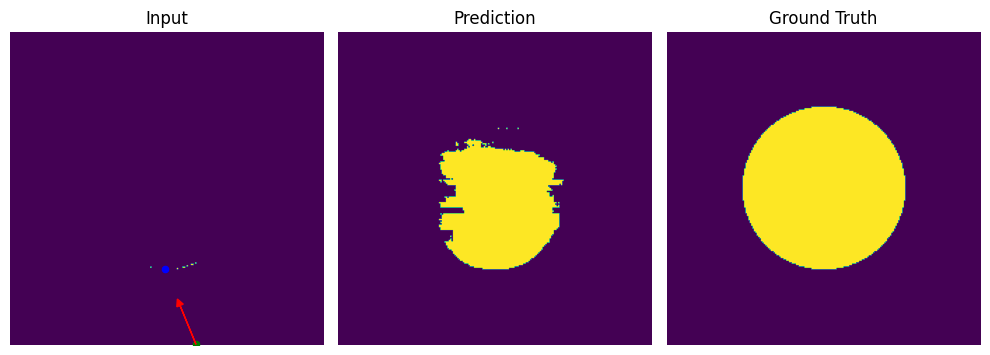

Current similarity : 0.576630689762869
Episode 5:
  Action Taken: [-0.2043528   0.12399086]
  Reward Received: 0.576630689762869
  Done: False, Truncated: False


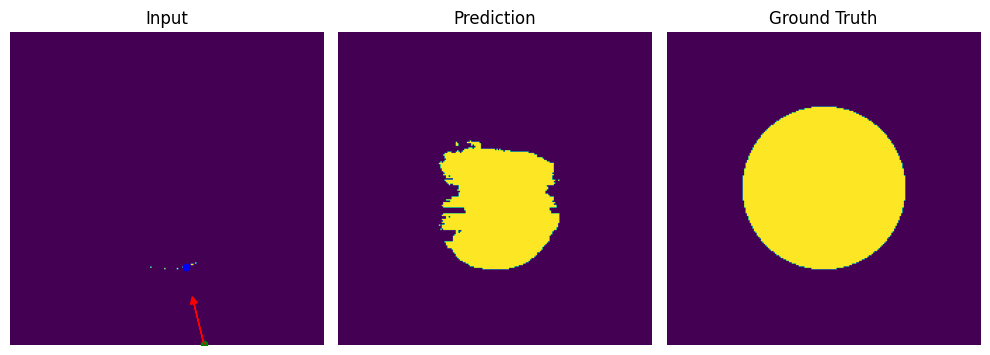

Current similarity : 0.5521351477661065
Episode 5:
  Action Taken: [-0.19164361  0.07651757]
  Reward Received: 0.5521351477661065
  Done: False, Truncated: False


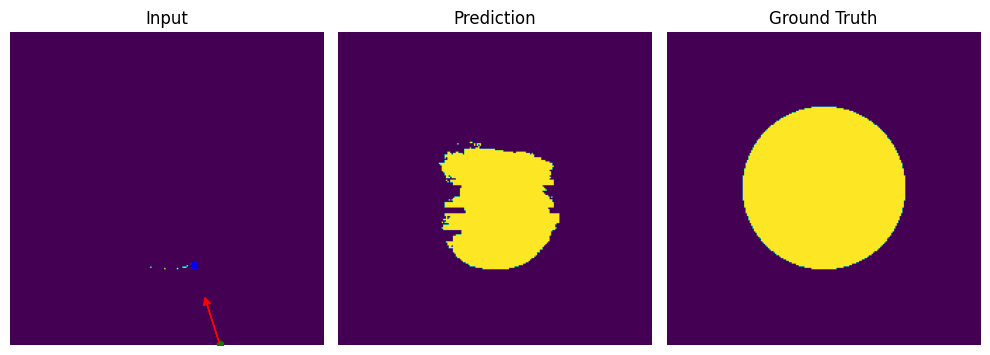

Current similarity : 0.5341655715661567
Episode 5:
  Action Taken: [-0.1664029   0.09843699]
  Reward Received: 0.5341655715661567
  Done: False, Truncated: False


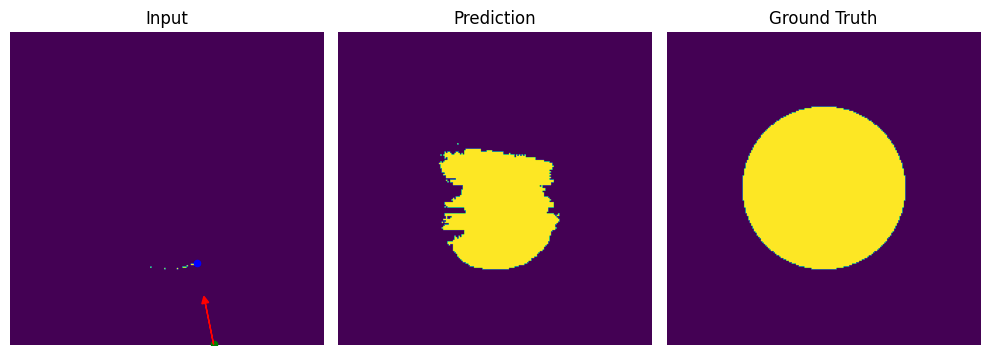

Current similarity : 0.519988738689941
Episode 5:
  Action Taken: [-0.17623703  0.06345796]
  Reward Received: 0.519988738689941
  Done: False, Truncated: False


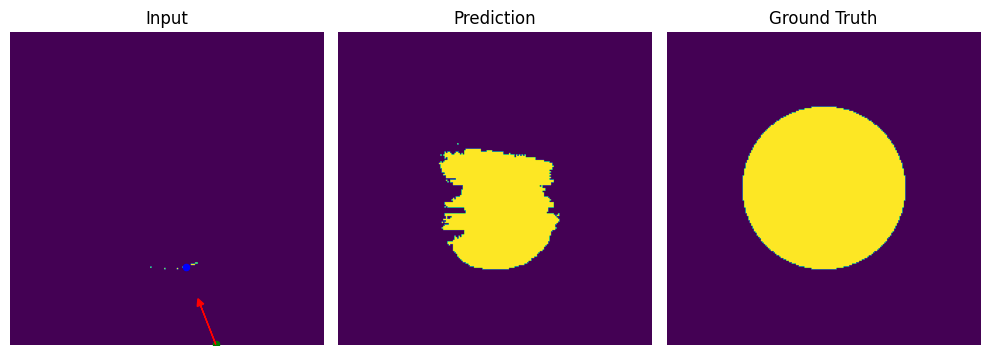

Current similarity : 0.519988738689941
Episode 5:
  Action Taken: [-0.1728057   0.11854345]
  Reward Received: 0.519988738689941
  Done: False, Truncated: False


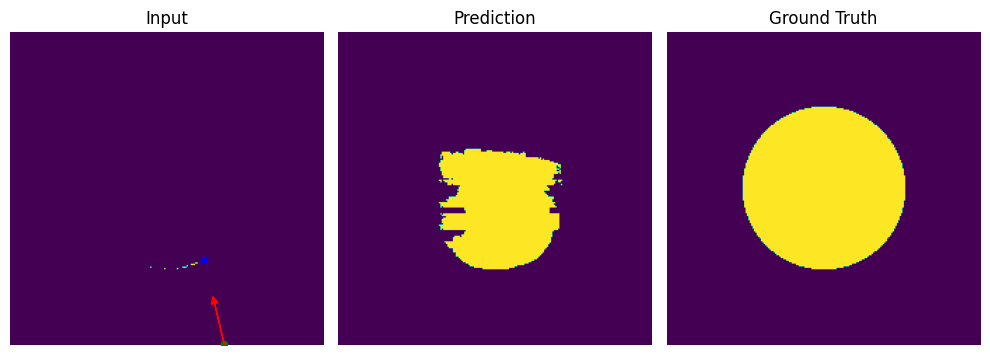

Current similarity : 0.5530018761207315
Episode 5:
  Action Taken: [-0.15922043  0.07344812]
  Reward Received: 0.5530018761207315
  Done: True, Truncated: False
Episode 5 finished. Resetting environment...
All episodes completed. Exiting...


In [3]:
num_episodes = 5
counter = 0

print(f"Starting environment rendering for {num_episodes} episodes...")
obs, info = env.reset()
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model.predict(obs, deterministic=False)
    obs, reward, done, truncated, info = env.step(action)

    env.render()  # Render the environment for visualization

    # Provide feedback to the user
    print(f"Episode {counter + 1}:")
    print(f"  Action Taken: {action}")
    print(f"  Reward Received: {reward}")
    print(f"  Done: {done}, Truncated: {truncated}")

    if done or truncated:
        print(f"Episode {counter + 1} finished. Resetting environment...")
        counter += 1
        obs, info = env.reset()

print("All episodes completed. Exiting...")

env.close()